In [ ]:

from myneo4j import App
import pandas as pd
import matplotlib.pyplot as plt

In [6]:

plt.rcParams.update({'font.size': 24})
plt.style.use('seaborn-ticks')

In [7]:
app = App(uri="bolt://localhost:7687", user="neo4j", pwd="frosch")

In [8]:
query = '''
MATCH (n) WHERE n.community_0 IS NOT NULL
RETURN n.community_0 as community
'''
result = app.query(query=query)
print(len(result))

424544


## Create Dictionary with the membercount for each community

In [9]:
communityCounts = dict()
communities = [record["community"] for record in result]
for com in communities:
    if com not in communityCounts:
        communityCounts[com] = 1
    else:
        communityCounts[com] += 1

## Distribution of the created communities sorted by communitycount
Displaying top 100 biggest communities

([], [])

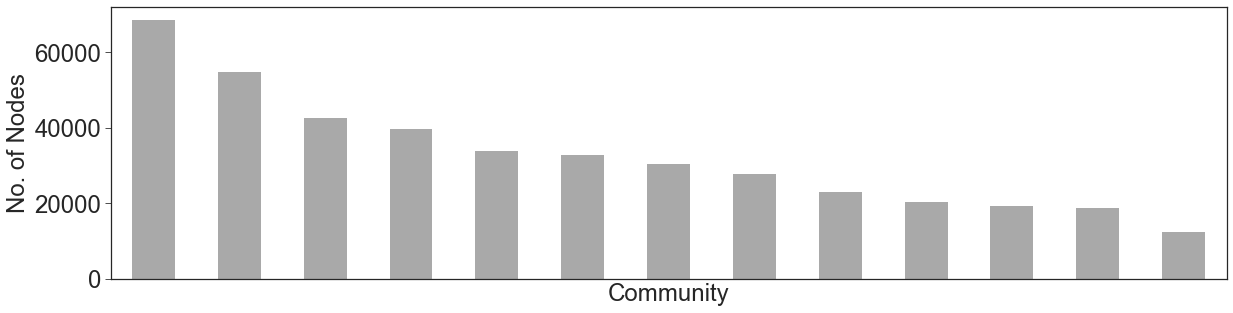

In [10]:


sortedComCounts = dict(sorted(communityCounts.items(), reverse=True, key=lambda item: item[1]))
# sortedCountList = [sortedComCounts[i] for i in sortedComCounts]
# dtf = pd.DataFrame(sortedCountList)
# dtf.head(100).plot(kind="bar", figsize=(20,5))
comCounts_ComId = pd.DataFrame.from_dict(sortedComCounts, orient="index")
comCounts_ComId.head(100).plot(kind="bar", figsize=(20,5), legend=None, color="darkgrey")
plt.xlabel("Community")
plt.ylabel("No. of Nodes")
plt.xticks([])



In [ ]:
app.close()

CALL apoc.periodic.iterate('Match (n:Article)-[:VENUE]-(v:Top200) WHERE n.community_0 IS NOT NULL AND n.community_1 return id(n) AS ID_Article, n.community_0 AS Community_FirstRun, n.community_1 AS Community_SecondRun, id(v) AS ID_RelatedVenue , n.title AS title, n.year AS year, n.abstract AS abstract', {batchSize:1000})

Match (n:Article)-[:VENUE]-(v:Top200)
WHERE n.community_0 IS NOT NULL AND n.community_1 
With id(n) AS ID_Article, n.community_0 AS Community_FirstRun, n.community_1 AS Community_SecondRun, id(v) AS ID_RelatedVenue , n.title AS title, n.year AS year, n.abstract AS abstract
CALL apoc.export.json.data([ID_Article, Community_FirstRun, Community_SecondRun, ID_RelatedVenue, title, year, abstract], null,{stream: true})
YIELD file, nodes, relationships, properties, data
RETURN file, nodes, relationships, properties, data